# load And Preprocess Dataset

In [22]:
df = pd.read_csv('Twitter_Data.csv')

# Display the first few rows of the DataFrame
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [47]:
import pandas as pd

# Load the Twitter_csv dataset
df = pd.read_csv('Twitter_Data.csv')  #  actual name of your dataset file

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

# Handle missing values
df.dropna(inplace=True)  # Remove rows with missing values

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle outliers (if applicable)
# You may want to examine numerical columns and apply appropriate techniques.

# Convert date columns to datetime format (if applicable)
# For example, if there is a column named 'timestamp'
# df['timestamp'] = pd.to_datetime(df['timestamp'])

# Other data cleaning steps as needed...

# Display basic information about the cleaned dataset
print(df.info())

# Display the first few rows of the cleaned DataFrame
print(df.head())

# Save the cleaned dataset
df.to_csv('cleaned_twitter_dataset.csv', index=False)  # Adjust the filename as needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
Index: 162969 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162969 non-null  object 
 1   category    162969 non-null  float64
dtypes: float6

In [48]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from sklearn.model_selection import train_test_split

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('cleaned_twitter_dataset.csv')

# Tokenization, stemming, and removing irrelevant information
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # Tokenize and stem
    words = word_tokenize(text)
    words = [ps.stem(word.lower()) for word in words if word.isalnum() and word.lower() not in stop_words]
    
    return ' '.join(words)

df['processed_text'] = df['clean_text'].apply(preprocess_text)

# Save the processed dataset
df.to_csv('processed_twitter_dataset.csv', index=False)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


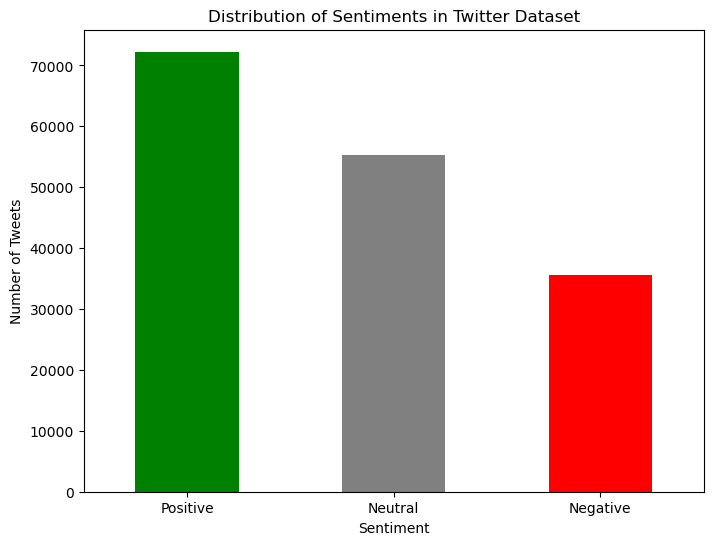

In [23]:
df = pd.read_csv('cleaned_twitter_dataset.csv')  

# Map numerical labels to corresponding sentiments
df['Sentiment'] = df['category'].map({-1: 'Negative', 0: 'Neutral', 1: 'Positive'})

# Count the occurrences of each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'grey', 'red'])

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Distribution of Sentiments in Twitter Dataset')

# Add explicit labels to x-axis ticks
plt.xticks(rotation=0)
plt.xticks(range(len(sentiment_counts)), sentiment_counts.index)

# Display the plot
plt.show()

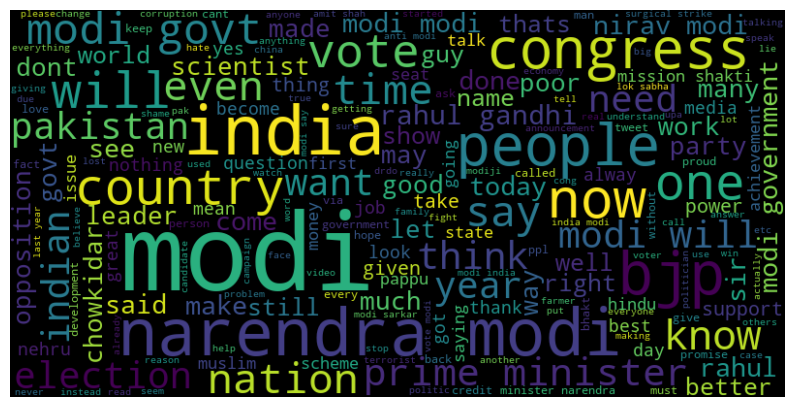

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your cleaned Twitter data from CSV
df = pd.read_csv('processed_twitter_dataset.csv')

# tweets are in a column named 'text', adjust this if needed
tweets = df['clean_text'].dropna().str.cat(sep=' ')

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(tweets)

# Plot the WordCloud image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


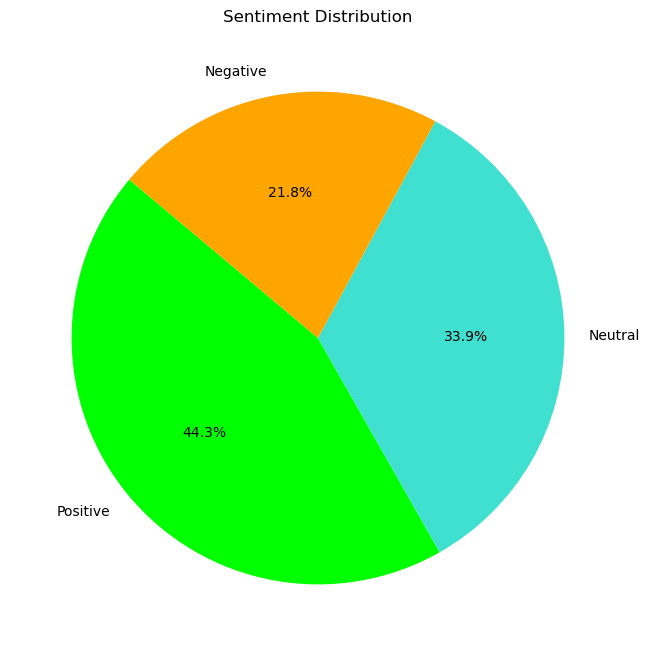

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned Twitter data from CSV
df = pd.read_csv('processed_twitter_dataset.csv')

# Assuming your sentiment column is named 'category', adjust this if needed
sentiment_distribution = df['category'].value_counts()

# Mapping sentiment labels for better visualization
sentiment_labels = {1: 'Positive', 0: 'Neutral', -1: 'Negative'}
sentiment_distribution.index = sentiment_distribution.index.map(sentiment_labels)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=140, colors=['lime', 'turquoise', 'orange'])
plt.title('Sentiment Distribution')
plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D

# Load the dataset
data = pd.read_csv("processed_twitter_dataset.csv")

# Split the dataset into input (X) and target (y) variables
X = data['clean_text']
y = data['category']

# Tokenize the input text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform input length
max_len = max([len(seq) for seq in X_sequences])
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Convert labels to one-hot encoding
num_classes = len(np.unique(y))
y_one_hot = pd.get_dummies(y).values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_one_hot, test_size=0.2, random_state=42)


# LSTM

In [4]:
# Define the LSTM model
embedding_dim = 100
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
epochs = 8
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

# Confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)


Epoch 1/8
2038/2038 [==============================] - 633s 308ms/step - loss: 0.2873 - accuracy: 0.8977 - val_loss: 0.1439 - val_accuracy: 0.9595
Epoch 2/8
2038/2038 [==============================] - 586s 288ms/step - loss: 0.0952 - accuracy: 0.9706 - val_loss: 0.0975 - val_accuracy: 0.9699
Epoch 3/8
2038/2038 [==============================] - 520s 255ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.1025 - val_accuracy: 0.9676
Epoch 4/8
2038/2038 [==============================] - 578s 284ms/step - loss: 0.0373 - accuracy: 0.9879 - val_loss: 0.1068 - val_accuracy: 0.9685
Epoch 5/8
2038/2038 [==============================] - 566s 278ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.1309 - val_accuracy: 0.9653
Epoch 6/8
2038/2038 [==============================] - 506s 248ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.1353 - val_accuracy: 0.9651
Epoch 7/8
2038/2038 [==============================] - 618s 303ms/step - loss: 0.0122 - accuracy: 0.9961 - val_loss: 0

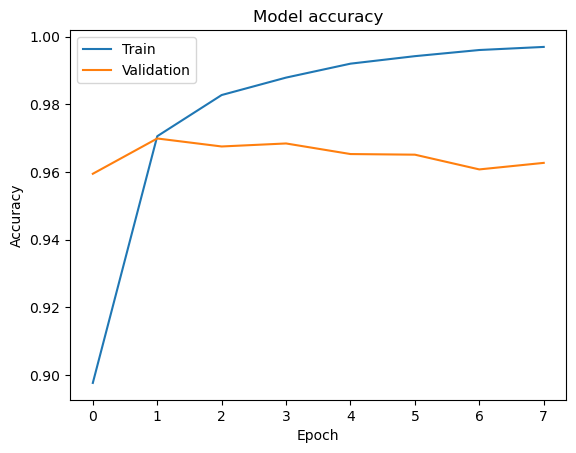

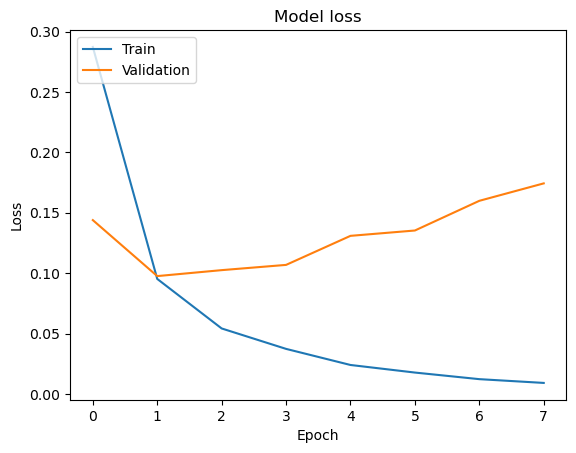

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

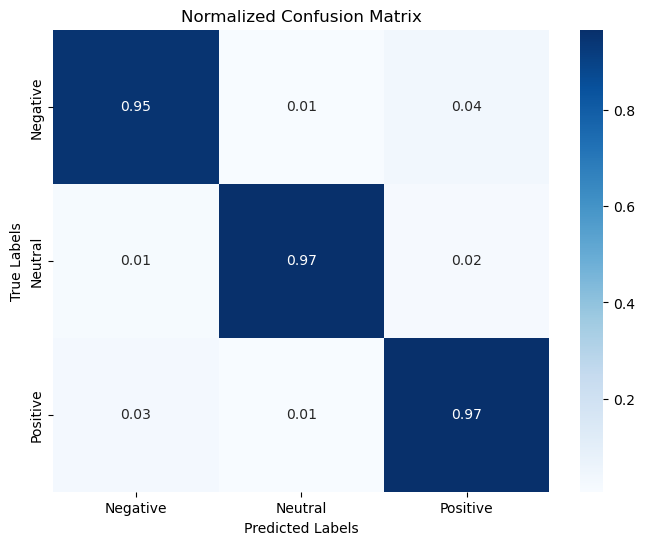

In [27]:
# Calculate row sums
row_sums = conf_matrix.sum(axis=1, keepdims=True)

# Normalize confusion matrix
normalized_conf_matrix = conf_matrix / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()


In [21]:
# Assume new_tweets is a list of strings containing new tweets
new_tweets = ["I like this product!", "This movie is ok", "Just aced my test"]

# Tokenize and pad the new tweets
new_sequences = tokenizer.texts_to_sequences(new_tweets)
new_padded = pad_sequences(new_sequences, maxlen=max_len)

# Predict sentiment for new tweets
predictions = model.predict(new_padded)

# Map predicted labels to categories
predicted_labels = np.argmax(predictions, axis=1)
sentiments = {0: 'Neutral', 1: 'Positive', 2: 'Negative'}
predicted_sentiments = [sentiments[label] for label in predicted_labels]

# Print out sentiments for new tweets
for tweet, sentiment in zip(new_tweets, predicted_sentiments):
    print(f'Tweet: {tweet} | Predicted Sentiment: {sentiment}')


1/1 [==============================] - 0s 32ms/step
Tweet: I like this product! | Predicted Sentiment: Positive
Tweet: This movie is ok | Predicted Sentiment: Positive
Tweet: Just aced my test | Predicted Sentiment: Positive


# Navie Bayes

Accuracy: 0.736546603669387
Confusion Matrix:
[[ 2974   535  3643]
 [   92  7348  3627]
 [  207   483 13685]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.42      0.57      7152
         0.0       0.88      0.66      0.76     11067
         1.0       0.65      0.95      0.77     14375

    accuracy                           0.74     32594
   macro avg       0.81      0.68      0.70     32594
weighted avg       0.79      0.74      0.72     32594



C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


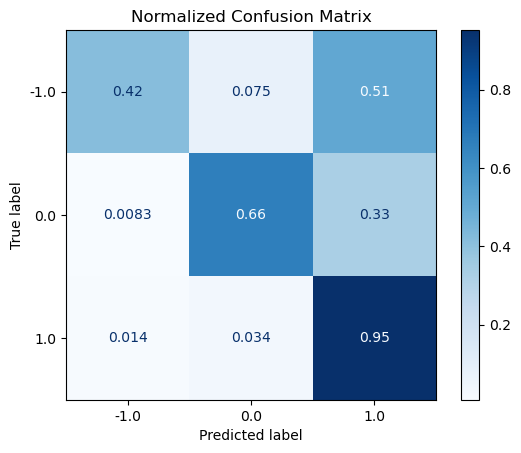

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

# Load the processed dataset
df = pd.read_csv('cleaned_twitter_dataset.csv')

# Handle missing values
df['clean_text'].fillna('', inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)

# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features based on your dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build and train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

# Plot the confusion matrix
plot_confusion_matrix(naive_bayes, X_test_tfidf, y_test, display_labels=df['category'].unique(), cmap=plt.cm.Blues, normalize='true')
plt.title('Normalized Confusion Matrix')
plt.show()


In [29]:
# Example predictions
example_tweets = [
    "I love this product! It's amazing.",
    "Terrible experience with the customer service.",
    "i am enjoying this rain."
]

# Convert example tweets to TF-IDF features
example_tweets_tfidf = tfidf_vectorizer.transform(example_tweets)

# Make predictions for example tweets
example_predictions = naive_bayes.predict(example_tweets_tfidf)

# Map sentiment labels for better readability
sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}

# Display example predictions
for tweet, prediction in zip(example_tweets, example_predictions):
    sentiment_label = sentiment_mapping[prediction]
    print(f'Tweet: "{tweet}"\nPredicted Sentiment: {sentiment_label}\n{"-"*30}')

Tweet: "I love this product! It's amazing."
Predicted Sentiment: Positive
------------------------------
Tweet: "Terrible experience with the customer service."
Predicted Sentiment: Negative
------------------------------
Tweet: "i am enjoying this rain."
Predicted Sentiment: Positive
------------------------------


# Hybrid Model

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a simple preprocess_text function (you can customize this based on your needs)
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|\d+", "", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Load the processed dataset
df = pd.read_csv('processed_twitter_dataset.csv')

# Handle missing values
df['processed_text'].fillna('', inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['category'], test_size=0.2, random_state=42)

# Traditional Machine Learning Model (Naive Bayes)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
nb_predictions = nb_classifier.predict(X_test_vectorized)

# Deep Learning Model (LSTM)
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

embedding_dim = 50
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
lstm_model.add(LSTM(units=50, activation='relu'))
lstm_model.add(Dense(units=3, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=32, validation_split=0.1)

# Predict using the LSTM model
lstm_predictions = lstm_model.predict(X_test_padded)
lstm_predictions_classes = lstm_predictions.argmax(axis=-1)

# Ensemble: Combine Predictions from Naive Bayes and LSTM
ensemble_predictions = []
for nb_pred, lstm_pred in zip(nb_predictions, lstm_predictions_classes):
    # You can customize the logic for combining predictions (e.g., voting, averaging, etc.)
    combined_pred = nb_pred if nb_pred == lstm_pred else lstm_pred
    ensemble_predictions.append(combined_pred)

# Evaluate the Ensemble Model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_predictions)
ensemble_classification_rep = classification_report(y_test, ensemble_predictions)

print(f'Ensemble Model Accuracy: {ensemble_accuracy}')
print(f'Ensemble Model Confusion Matrix:\n{ensemble_conf_matrix}')
print(f'Ensemble Model Classification Report:\n{ensemble_classification_rep}')



Epoch 1/5
3667/3667 [==============================] - 153s 41ms/step - loss: 0.5414 - accuracy: 0.7912 - val_loss: 0.4031 - val_accuracy: 0.8563
Epoch 2/5
3667/3667 [==============================] - 154s 42ms/step - loss: 0.3656 - accuracy: 0.8690 - val_loss: 0.3888 - val_accuracy: 0.8605
Epoch 3/5
3667/3667 [==============================] - 160s 44ms/step - loss: 0.3174 - accuracy: 0.8845 - val_loss: 0.4038 - val_accuracy: 0.8598
Epoch 4/5
3667/3667 [==============================] - 150s 41ms/step - loss: 0.2738 - accuracy: 0.8991 - val_loss: 0.4311 - val_accuracy: 0.8527
Epoch 5/5
1019/1019 [==============================] - 14s 14ms/step
Ensemble Model Accuracy: 0.6827023378535927
Ensemble Model Confusion Matrix:
[[    0   744  1031  5377]
 [    0  9794   873   400]
 [    0  1024 12458   893]
 [    0     0     0     0]]
Ensemble Model Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      7152
         0.0  

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classif

C:\Users\User\AppData\Local\Temp\ipykernel_18236\3779910280.py:7: RuntimeWarning: invalid value encountered in divide
  normalized_ensemble_conf_matrix = ensemble_conf_matrix / row_sums


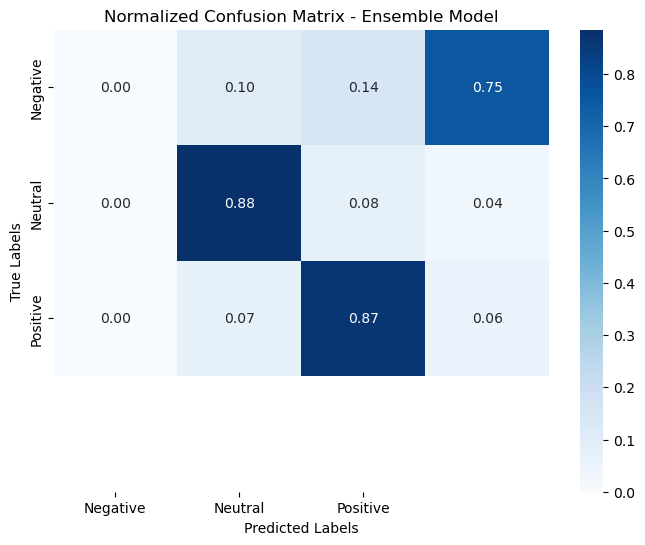

In [43]:
import seaborn as sns

# Calculate row sums
row_sums = ensemble_conf_matrix.sum(axis=1, keepdims=True)

# Normalize confusion matrix
normalized_ensemble_conf_matrix = ensemble_conf_matrix / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_ensemble_conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix - Ensemble Model')
plt.show()


Epoch 1/5
3667/3667 [==============================] - 140s 38ms/step - loss: 0.1982 - accuracy: 0.9265 - val_loss: 0.5345 - val_accuracy: 0.8462
Epoch 2/5
3667/3667 [==============================] - 157s 43ms/step - loss: 0.1677 - accuracy: 0.9381 - val_loss: 0.6191 - val_accuracy: 0.8449
Epoch 3/5
3667/3667 [==============================] - 153s 42ms/step - loss: 0.1408 - accuracy: 0.9487 - val_loss: 0.7073 - val_accuracy: 0.8356
Epoch 4/5
3667/3667 [==============================] - 152s 41ms/step - loss: 0.1169 - accuracy: 0.9580 - val_loss: 0.8285 - val_accuracy: 0.8331
Epoch 5/5
3667/3667 [==============================] - 152s 42ms/step - loss: 0.0980 - accuracy: 0.9647 - val_loss: 0.8979 - val_accuracy: 0.8303


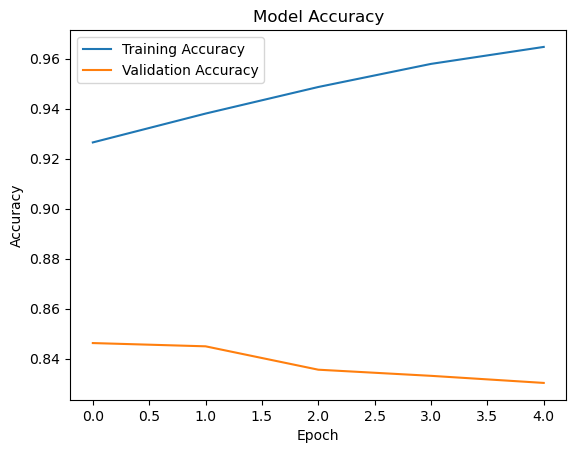

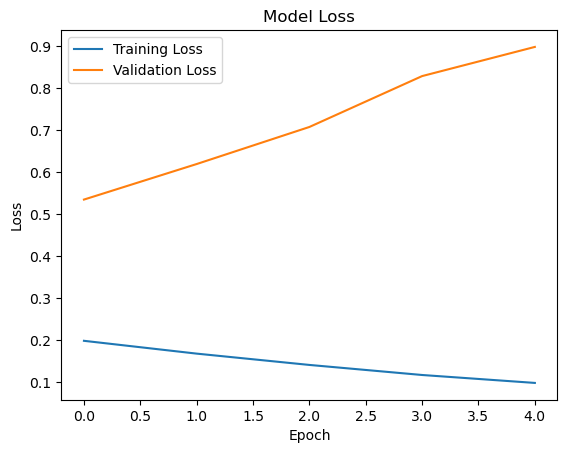

In [45]:
import matplotlib.pyplot as plt

# Fit the LSTM model and record training history
history = lstm_model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=32, validation_split=0.1)

# Plot training history for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training history for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [46]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.utils import to_categorical

# Define a simple preprocess_text function (you can customize this based on your needs)
def preprocess_text(text):
    # Remove special characters, URLs, and user mentions
    text = re.sub(r"http\S+|www\S+|https\S+|@\w+|\d+", "", text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Load your trained models and preprocessing components

# Traditional Machine Learning Model (Naive Bayes)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
# Assuming X_train is your training data
X_train_vectorized = vectorizer.fit_transform(X_train)
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Deep Learning Model (LSTM)
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
# Assuming X_train_sequences is your tokenized training data
X_train_sequences = tokenizer.texts_to_sequences(X_train)
max_sequence_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
y_train_categorical = to_categorical(y_train, num_classes=3)
embedding_dim = 50
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
lstm_model.add(LSTM(units=50, activation='relu'))
lstm_model.add(Dense(units=3, activation='softmax'))
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_padded, y_train_categorical, epochs=5, batch_size=32, validation_split=0.1)

# Example to predict sentiment of a new tweet
def predict_sentiment(new_tweet):
    # Preprocess the new tweet
    preprocessed_tweet = preprocess_text(new_tweet)

    # Traditional Machine Learning Model (Naive Bayes)
    nb_vectorized_tweet = vectorizer.transform([preprocessed_tweet])
    nb_prediction = nb_classifier.predict(nb_vectorized_tweet)[0]

    # Deep Learning Model (LSTM)
    lstm_sequence = tokenizer.texts_to_sequences([preprocessed_tweet])
    lstm_padded_sequence = pad_sequences(lstm_sequence, maxlen=max_sequence_length)
    lstm_prediction = lstm_model.predict(lstm_padded_sequence)[0]
    lstm_prediction_class = lstm_prediction.argmax()

    # Combine predictions (you can customize the logic based on your requirements)
    combined_pred = nb_prediction if nb_prediction == lstm_prediction_class else lstm_prediction_class

    return combined_pred

# Example usage
new_tweet = "I'm really excited about the new product!"
predicted_sentiment = predict_sentiment(new_tweet)

# Print the predicted sentiment
print(f'Tweet: {new_tweet}\nPredicted Sentiment: {predicted_sentiment}')

Epoch 1/5
3667/3667 [==============================] - 137s 37ms/step - loss: 0.4945 - accuracy: 0.8101 - val_loss: 0.3952 - val_accuracy: 0.8577
Epoch 2/5
3667/3667 [==============================] - 129s 35ms/step - loss: 0.3630 - accuracy: 0.8690 - val_loss: 0.3884 - val_accuracy: 0.8580
Epoch 3/5
3667/3667 [==============================] - 130s 35ms/step - loss: 0.3203 - accuracy: 0.8823 - val_loss: 0.3937 - val_accuracy: 0.8599
Epoch 4/5
3667/3667 [==============================] - 129s 35ms/step - loss: 0.2791 - accuracy: 0.8959 - val_loss: 0.4358 - val_accuracy: 0.8536
Epoch 5/5
1/1 [==============================] - 0s 222ms/step
Tweet: I'm really excited about the new product!
Predicted Sentiment: 1.0
